In [66]:
#slopes plot extracted from txt files
import numpy as np
import yt
import time
from yt.funcs import mylog
import matplotlib.pyplot as plt
mylog.setLevel(40) #prevents warning
plt.style.use('default')
import scipy
from scipy import optimize
import pandas as pd

In [77]:
#importing timing and other files
inputfile = ('slope_0%.txt','slope_1%.txt','slope_2%.txt','slope_3%.txt','slope_4%.txt','slope_5%.txt')#,'slope_10%_and_6%.txt',)
time_file = pd.read_csv("Time_conversions.csv")
times = time_file['time']
times = times*3.71e-8   #convert seconds to Myear
time_gtmp =times[0:6]
time_gtm = times[7:13]
time_gt = times[14:20]
time_g = times[21:27]

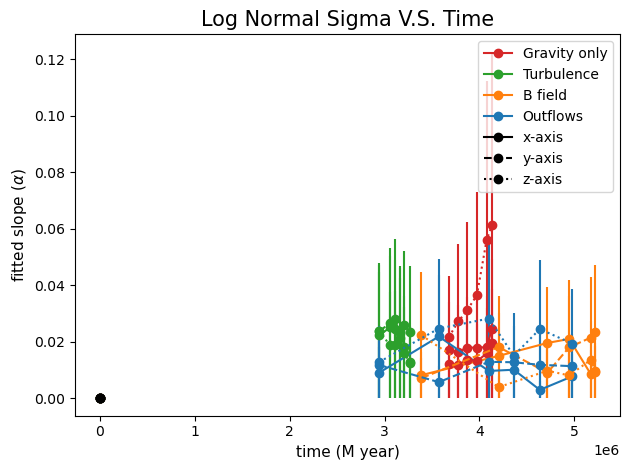

In [88]:
#main plotting cell
line = ('solid', 'dashed', 'dotted')
inputfile = ('txt_file_storage/sigma_0%.txt','txt_file_storage/sigma_1%.txt','txt_file_storage/sigma_2%.txt','txt_file_storage/sigma_3%.txt','txt_file_storage/sigma_4%.txt','txt_file_storage/sigma_5%.txt')
for a in range(3):
    slope_x_g = []
    slope_x_gt = []
    slope_x_gtm = []
    slope_x_gtmp = []
    error_x_g = []
    error_x_gt = []
    error_x_gtm = []
    error_x_gtmp = []
    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        slope_x_g.append(slope_list[0+a])
        slope_x_gt.append(slope_list[3+a])
        slope_x_gtm.append(slope_list[6+a])
        slope_x_gtmp.append(slope_list[9+a])
        #error bar cutting
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[1]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        error_x_g.append(slope_list[0+a])
        error_x_gt.append(slope_list[3+a])
        error_x_gtm.append(slope_list[6+a])
        error_x_gtmp.append(slope_list[9+a])
        
    plt.errorbar(time_g,slope_x_g,yerr = error_x_g, marker = "o", color = 'C3', linestyle = line[a])#, alpha =alpha[a])
    plt.errorbar(time_gt,slope_x_gt,yerr = error_x_gt, marker = "o", color = 'C2', linestyle = line[a])#, alpha =alpha[a])
    plt.errorbar(time_gtm,slope_x_gtm,yerr = error_x_gtm, marker = "o", color = 'C1', linestyle = line[a])#, alpha =alpha[a])
    plt.errorbar(time_gtmp,slope_x_gtmp,yerr = error_x_gtmp, marker = "o", color = 'C0', linestyle = line[a])#, alpha =alpha[a])
    #Invisible lines to fix legend
    plt.plot(0,0, marker = "o", color = 'C3', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'C2', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'C1', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'C0', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'black', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'black', linestyle = line[1])
    plt.plot(0,0, marker = "o", color = 'black', linestyle = line[2])
    #plot bells and whistles
    plt.title('Log Normal Sigma V.S. Time', size = 15)
    plt.xlabel('time (M year)', size=11)
    plt.ylabel(r'fitted slope ($\alpha$)', size=11)
    #plt.ylim( -5.5,-1.8)
    #plt.xlim(1.8e6,5.5e6)
    plt.legend(['Gravity only', 'Turbulence', 'B field', 'Outflows', 'x-axis','y-axis','z-axis'])
    plt.tight_layout()
plt.savefig('cdensity_slope_plot')


In [ ]:
#main plotting cell
line = ('solid', 'dashed', 'dotted')

for a in range(3):
    slope_x_g = []
    slope_x_gt = []
    slope_x_gtm = []
    slope_x_gtmp = []
    error_x_g = []
    error_x_gt = []
    error_x_gtm = []
    error_x_gtmp = []
    sfe = range(6)
    for ii in range(6):
        #slope cutting. data from txt file chopped into usable form.
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[0]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        slope_x_g.append(slope_list[0+a])
        slope_x_gt.append(slope_list[3+a])
        slope_x_gtm.append(slope_list[6+a])
        slope_x_gtmp.append(slope_list[9+a])
        #error bar cutting
        f =open(inputfile[ii])
        newlist = [i for i in f]
        string = newlist[1]
        string1 = string.split("[")[1]
        string2 = string1.split("]")[0]
        string3 = string2.split(",")
        string3 = np.array(string3)
        slope_list = string3.astype('float')
        error_x_g.append(slope_list[0+a])
        error_x_gt.append(slope_list[3+a])
        error_x_gtm.append(slope_list[6+a])
        error_x_gtmp.append(slope_list[9+a])
        
    plt.errorbar(time_g,slope_x_g,yerr = error_x_g, marker = "o", color = 'C3', linestyle = line[a])#, alpha =alpha[a])
    plt.errorbar(time_gt,slope_x_gt,yerr = error_x_gt, marker = "o", color = 'C2', linestyle = line[a])#, alpha =alpha[a])
    plt.errorbar(time_gtm,slope_x_gtm,yerr = error_x_gtm, marker = "o", color = 'C1', linestyle = line[a])#, alpha =alpha[a])
    plt.errorbar(time_gtmp,slope_x_gtmp,yerr = error_x_gtmp, marker = "o", color = 'C0', linestyle = line[a])#, alpha =alpha[a])
    #Invisible lines to fix legend
    plt.plot(0,0, marker = "o", color = 'C3', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'C2', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'C1', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'C0', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'black', linestyle = line[0])
    plt.plot(0,0, marker = "o", color = 'black', linestyle = line[1])
    plt.plot(0,0, marker = "o", color = 'black', linestyle = line[2])
    #plot bells and whistles
    plt.title('Fitted Slope V.S. time', size = 15)
    plt.xlabel('time (M year)', size=11)
    plt.ylabel(r'fitted slope ($\alpha$)', size=11)
    plt.ylim( -5.5,-1.8)
    plt.xlim(1.8e6,5.5e6)
    plt.legend(['Gravity only', 'Turbulence', 'B field', 'Outflows', 'x-axis','y-axis','z-axis'])
    plt.tight_layout()
plt.savefig('cdensity_slope_plot')
